# Back to Bayes-ics

Please ensure you have watched the Chapter 6 video(s).

## You will learn the following things in this Chapter

- The idea of a conjugate prior and why they are useful.
- The interplay between priors and new data.
- Use Bayes Theorem on standard forms of probability density functions.
- Use this to do hypothesis testing in the Bayes framework.
- How to use Python programming to do the above.
- After completing this notebook you will be able to start CA 2.

***

Previously (Chapter 2) we used Bayes Theorem to find the probability of A | B using discrete data points, but here we will see that we can also use it to find the probability density function that some model or model parameter explains the data given the data we measure and some previously measured values or estimates at the parameter (the prior). Let's remind ourselves that:

$P(\theta | D) = \dfrac{ P(D | \theta) P(\theta)} { P(D)}.$

Let's recap the terms:

- $P(\theta | D)$ the **posterior** - the probability of model parameter $\theta$ being true, given the data
- $ P(D | \theta) $ the **likelihood** - given model parameter $\theta$ what is likelihood of obtaining the data
- $ P(\theta)$ the **prior** - the probability of the model parameter $\theta$ being ‘true’
- $P(D)$ the **evidence** - the probability of getting the data, give all possible model parameter values ($\theta$ and others!)

In this Chapter we'll take a look at some classic examples where we can (easily) analytically solve the equations to get the model parameters out (which for us are the mean and standard deviation) out of the data we observe.  From above we can see that the posterior probability is what we want to calculate, the prior is what we think we already know about the population, and the likelihood is the likelihood of obtaining our data given the measured mean and standard deviation.

We will look at 2 common situations:
- a likelihood that can be described by a normal distribution
- a likelihood that can be described by a bernoulli/binomial distribution

Before we do this, we also define the term **conjugate prior**. This is one that has the same functional form as the posterior. If the likelihood is normally distributed, then the choice of a normal prior will ensure that the posterior is also a normal, and as such, our prior can be said to be conjugate. This is generally a good thing! 

Even if the true functional form of the posterior is *not* conjugate, it is common practise to approximate the prior distribution with a function that is, simply because it makes the mathematics easier, and it makes the functions behave! *Note that the prior is only conjugate when we consider likelihoods of a certain functional form.*

***

# Normal likelihood - normal prior

## Analytical expressions

Suppose that we have a set of observations $X = {x_1, x_2, \ldots, x_n}$ of some quantity that we believe to have been drawn from a normal distribution. We can then write,

$p(x|\theta) = N(\theta, \sigma)$

where $\theta$ is the mean value of the distribution (unknown) and $\sigma$ describes the width (known).

We can then also write the probability of the mean of the sample, $\hat X$, as,

$p(\hat X | \theta) = N(\theta, \sigma/\sqrt{n})$

Notice that now we do not use $\sigma$ as the error since as we make more measurements, our estimate of the mean gets better (recall the difference between the error and the standard error on the mean!).

Now suppose that we have some data from a previous study that reports a value for $\theta$ of $\mu_0$, with an associated error, $\sigma_0$. This study was also subject to random errors, so we are free to write,

$p(\theta) = N(\mu_0, \sigma_0)$

Bayes theorem allows us to combine this information to determine the PDF of $\theta$.  Since the denominator is the integral over all $\theta$, it is just a constant, and so it doesn't affect the shape of the posterior, only the height. As such, we can ignore it for the moment, and focus on the numerator (i.e. the likelihood $\times$ prior).

Since both the likelihood and prior are normal distributions, the posterior must also be a normal distribution, this leads to the following expressions for the mean and standard deviation of the posterior.

$ \hat{\theta}  = \dfrac{\sigma_0^2}{\sigma_0^2 + \sigma^2/n} \hat{X}   +  \dfrac{\sigma^2/n} {\sigma_0^2 + \sigma^2/n} \mu_0
$

$\hat{\sigma}^2 =  \dfrac{\sigma_0^2 \sigma^2/n} {\sigma_0^2 + \sigma^2/n}.$

A nice way of thinking about this interplay between the prior and likelihood, is to imagine that the prior is simply adding another data point. If this data point is good (i.e. small variance, such that it is strongly peaked around the mean), then the prior pulls the posterior towards it. If the prior is vague, then it behaves like a data point with a big error, and the posterior relies on the data to provide the underlying shape. This is same behaviour, and indeed very similar maths, to the idea of *weighted averages* that we discussed in Chapter 5.

**Good and Bad Data**

When the data is good (eg if $\sigma$ is small, and/or $n$ is large), the equation for the mean above shows that the 1st term will tend to one and the second term to zero, the *posterior will favour the data over the prior*. 

When the data is bad (eg if $\sigma$ is large, and/or $n$ is small), the equation for the mean above shows that the 1st term will tend to one and the second term to zero, the *posterior will favour the data over the prior*. 

So to recap, the figure below summarises what we need to do to get the Bayesian probability density function (posterior) from the prior and likelihood, and how we may then get out statistics such as mean, variance etc.

<img src="https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter%206/bayespdf.png" width="400">

### <font color=#4290C4>Example</font>

Ten 20-year old students have their heights measured (in cm) with variance of 50cm resulting in the following data:


heights = 169.6, 166.8, 157.1, 181.1, 158.4, 165.6, 166.7, 156.5, 168.1, 165.3


A previous set of (normally distributed) measurements said the mean and standard deviation of heights is 170  ±  3cm.


Assuming that the heights are drawn from a normal distribution, state what shape the posterior distribution has and derive the mean and standard deviation of the posterior distribution.


Plot the data you observe as a histogram. Also plot the PDFs for the likelihood, the prior and the posterior. Briefly discuss what you see.


Plot the posterior PDF and overplot the mean and standard deviation of the posterior (tip: plt.axvline(value) plots a vertical line).

###  <font color=#c38241> Solution</font>

Click below to see the solution.

likelihood mean and error are 165.520,2.236
posterior mean and std are 167.120,1.793


Text(0, 0.5, 'PDF')

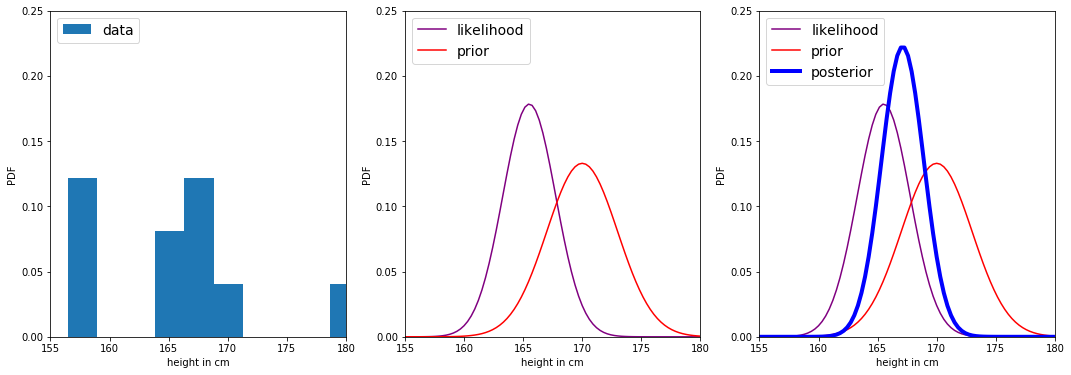

In [58]:
import numpy as np
import pylab as plt
from scipy.stats import norm

%matplotlib inline

# function for mean of posterior if posterior normal
def post_mean(var_0,var,n,X,mu_0):
    result = (var_0/ (var_0 + (var/n)) ) * X + ((var/n)/(var_0+(var/n)))*mu_0
    return result

# function for width (standard dev) of posterior if posterior normal
def post_std(var_0,var,n):
    result = np.sqrt((var_0*(var/n)) / (var_0 + (var/n)))
    return result

ht = [169.6,166.8,157.1,181.1,158.4,165.6,166.7,156.5,168.1,165.3]
n = len(ht)

var = 50.
err_mean = np.sqrt(var/n)

data_mean = np.mean(ht)
data_var = var
prior_var = 3**2.
prior_mean = 170. 

# set up an array
x = np.linspace(150,180,100)

# these are normal distributions so 
# can use the analytical equations from the notes for posterior
# mean and standard deviation
posterior_mean = post_mean(prior_var,data_var,n,data_mean,prior_mean)

posterior_std = post_std(prior_var,data_var,n)

print('likelihood mean and error are {:.3f},{:.3f}'.format(data_mean,err_mean))

print('posterior mean and std are {:.3f},{:.3f}'.format(posterior_mean,posterior_std))

plt.figure(figsize=(18,6))
# for plotting

plt.subplot(131)
plt.hist(ht,density=True,label='data')
plt.legend(loc='upper left',fontsize=14)
plt.xlim(155,180)
plt.ylim(0,0.25)
plt.xlabel('height in cm')
plt.ylabel('PDF')

plt.subplot(132)
plt.plot(x,norm.pdf(x,data_mean,err_mean),label='likelihood',c='purple') #likelihood
plt.plot(x,norm.pdf(x,prior_mean,np.sqrt(prior_var)),label='prior',c='red') # prior distribution
plt.legend(loc='upper left',fontsize=14)
plt.xlim(155,180)
plt.ylim(0,0.25)
plt.xlabel('height in cm')
plt.ylabel('PDF')

plt.subplot(133)
plt.plot(x,norm.pdf(x,data_mean,err_mean),label='likelihood',c='purple') #likelihood
plt.plot(x,norm.pdf(x,prior_mean,np.sqrt(prior_var)),label='prior',c='red') # prior distribution
plt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior',c='blue',lw=4)
plt.legend(loc='upper left',fontsize=14)
plt.xlim(155,180)
plt.ylim(0,0.25)
plt.xlabel('height in cm')
plt.ylabel('PDF')

What does this plot tell us? We can see that the prior is quite far from data. The data has a few peaks and is not really Gaussian! but we do expect the population to be Gaussian. The peaks at heights $<$160cm caused the likelihood PDF to peak at a lower mean than the previous measurement (the prior). The posterior (given the prior information) favours the second group of data points but has a wider distribution.  

### Derivation: Mean and Variance from the Normal Distribution

How did we get the analytical expressions for the mean and variance of a normally distributed posterior? 

$p(\theta | \hat{X}) \propto  p(\hat{X} | \theta) p(\theta) $

$ \propto \mbox{exp} \left[ - \dfrac{ (\hat{X} - \theta)^2} {2\sigma^2/n} \right] \mbox{exp} \left[ -\dfrac{(\theta - \mu_0)^2} {2\sigma_0^2} \right] $

$ \propto \mbox{exp} \left[ -\dfrac{1}{2} \left( \dfrac{\hat{X}^2 - 2\theta \hat{X} + \theta^2} {\sigma^2/n} + \dfrac{\theta^2 -2\theta\mu_0 + \mu_0^2} {\sigma_0^2} \right)  \right]$


$ \propto \mbox{exp}  \left[  -\dfrac{1}{2} \left( \dfrac{\theta^2}{\sigma^2/n} - \dfrac{2\theta\hat{X}}{\sigma^2/n} +\dfrac{\theta^2}{\sigma^2_0} - \dfrac{2\theta\mu_0}{\sigma_0^2} \right) \right]$


$ \propto \mbox{exp}  \left[  -\dfrac{1}{2} \left( \theta^2 \left( \dfrac{1}{\sigma^2/n} + \dfrac{1}{\sigma_0^2} \right) - 2\theta \left(  \dfrac{\hat{X}}{\sigma^2/n} + \dfrac{\mu_0}{\sigma_0^2} \right) \right) \right] $


Now, if we consider that $\theta$ were a normal distribution, then

$f(\theta) \propto \mbox{exp} \left[ -\dfrac{(\theta - \hat{\theta})^2}{2 \hat{\sigma}^2} \right]$

$\propto \mbox{exp} \left[ -\dfrac{1}{2} \left( \dfrac{\theta^2}{\hat{\sigma}^2}  - \dfrac{2 \theta \hat{\theta}}{\hat{\sigma}^2} \right) \right]$
 
 
which has the same form as the expansion of the product of the likelihood and prior above. So the posterior must also be a normal distribution, and we can match up the terms containing $\theta^2$ and $2\theta$ from the relations above. From matching the $\theta^2$ terms, we get,

$\hat{\sigma}^2 = \left(  \dfrac{1}{\sigma^2/n} + \dfrac{1}{\sigma_0^2}  \right)^{-1}$,

which after a little algebra, gives:

$\hat{\sigma}^2 =  \dfrac{\sigma_0^2 \sigma^2/n} {\sigma_0^2 + \sigma^2/n}.$

Similarly, we can match up the $2\theta$ terms to get,

$\dfrac{\hat{\theta}} {\hat{\sigma}^2} = \dfrac{\hat{X}}{\sigma^2/n} + \dfrac{\mu_0}{\sigma_0^2}$
 

$ \hat{\theta} = \dfrac{\sigma_0^2 \sigma^2/n} {\sigma_0^2 + \sigma^2/n} \left( \dfrac{\hat{X}}{\sigma^2/n} + \dfrac{\mu_0}{\sigma_0^2}   \right)$

$\hat{\theta} = \dfrac{\sigma_0^2}{\sigma_0^2 + \sigma^2/n} \hat{X}   +  \dfrac{\sigma^2/n} {\sigma_0^2 + \sigma^2/n} \mu_0 $

The expressions above give, respectively the mean ($\hat{\theta}$) and variance ($\hat{\sigma^2}$) of the **posterior** that describes the probability of $\theta$. More importantly, we can see that our mean of the posterior, $\hat{\theta}$, depends on *both the mean and variance of the data*, $\hat{X} ~~\text{and} ~~\sigma^2$, and *the mean and variance of the prior*, $\mu_0 ~~\text{and}~~ \sigma_0^2.$

# Binomial/Bernoulli Likelihood - beta prior

## Analytical expressions

After the normal likelihood, Binomial/Bernoulli distributions are probably the second most common form, since it covers a wide range of problems, such the ski test we saw earlier in the course, drug trials, etc. The conjugate prior to this is is a beta function determined by shape parameters $a$ and $b$.

The posterior mean is then given by,

$\hat{\theta}  = \dfrac{ \nu }{ N }\, \dfrac{ N }{ N + a + b }~ +~ \dfrac{ a }{ a + b} \, \dfrac{a + b}{ N + a + b }$

and the variance is 

$\sigma^2  = \dfrac{ \hat{\theta}(1 - \hat{\theta})}  {\nu+a + N-\nu+b + 1}.$

We can roughly associate $a$ with the number of successes you previously observed and $(a + b) \sim n$  with the number of trials you observed. So if you have a guess for the prior mean $m$, you can try

$a=mn$

$b=1-m$

eg if you have a coin but do not know if it is biased towards heads and tails then $a = b =0.5$ is a safe assumption. If you repeat the experiment 6 times and coin seems to be fair then a good choice might be $a=b=3$.  Here are some examples of priors using beta functions.

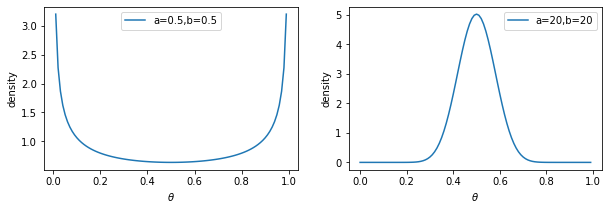

In [66]:
from scipy.stats import beta

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(x,beta.pdf(x,0.5,0.5),label='a=0.5,b=0.5')
plt.ylabel('density')
plt.xlabel(r'$\theta$')
plt.legend()

plt.subplot(122)
plt.plot(x,beta.pdf(x,20,20),label='a=20,b=20')
plt.ylabel('density')
plt.legend()
plt.xlabel(r'$\theta$')
plt.show()

#### Derivation: Mean and Variance from Binomial Distributions

How did we derive the analytical approximations to the posterior mean and variance for the Bernoulli/Binomial case?

Remember that Bernoulli and Binomial distributions both have the form,

$p(\nu | N, \theta) \propto \theta^{\nu} (1 - \theta)^{(N - \nu)}$.

In the case of the Bernoulli distribution, which focuses on a single outcome, the leading constant is 1, while in the case of the Binomial distribution, which accounts for any combination of the $\nu$ successes in $N$ trails, the leading constant is given by the binomial factor ${N \choose \nu} = N! / \nu!(N-\nu)!$.

Remember that the functional family that has the same form as Bernoulli and Binomial distributions are called **beta distributions**. The mean and variance of the beta distribution are given by,


$\hat{\theta}_{B} = \dfrac{a}{a+b}$

$\sigma_{B}^2  = \dfrac{ \hat{\theta}(1 - \hat{\theta})}  {a + b + 1}$.


One can consider the prior as if it is reporting previously observed data. In this case, we can equate the $a-1$ and $b-1$ in the beta distribution to the $\nu$ and $N-\nu$ terms in the Bernoulli and Binomial distributions. This can the be used to guide your choice of $a$ and $b$. 

For example, if you think the coin is a joke coin, but do not know whether it is biased towards heads or tails, then $a = b = 0.5$ is perhaps a good choice. If you think the coin is probably fair, based on a low number (around 5-6) of observations in the past, then $a = b = 4$ might be a good choice, or larger values of $a$ and $b$ if you had a larger sample in the past. Given the number of events in the previous trial, and its outcome, you can use this to calculate your $a$ and $b$ for the Bayes calculation.

The full form of a Bayesian analysis of a Bernoulli likelihood with beta prior is,

$ p(\theta |\nu, N)  = \dfrac{p(\nu, N \,|\, \theta)\,p(\theta)}{ p(\nu, N)} $

$ p(\theta |\nu, N)  = \dfrac{\theta^{\nu} \, (1 - \theta)^{(N - \nu)} \, \theta^{(a - 1)} \, (1 - \theta)^{(b - 1)} } {B(a, b)\, p(\nu, N)}$

$ p(\theta |\nu, N) = \dfrac{\theta^{(\nu + a) - 1} (1 - \theta)^{(N - \nu +b) -1} }   {B(\nu + a, ~ N-\nu + b)}$.

Although the powers of $\theta$ and $(1-\theta)$ probably made sense there, you are probably wondering where the magic on the denominator came from.   The clue is in the way we wrote the powers in the numerator, where you can see that we have deliberately written them in the form of a beta distribution, where 

$a \equiv \nu + a$,

and,

$b \equiv N - \nu + b$. 

This allows us to replace the complicated integral in the denominator with the standard normalisation for a beta distribution of the form beta$(\nu + a, ~ N - \nu +b)$, which is simply $B(\nu + a, ~ N-\nu + b)$.  

*Important: you must include the beta normalising denominator (from the beta distribution - see Chapter 3) in your posterior calculations, because it changes the shape of the beta function!*

Once again, we can look at the interplay between the mean predicted by the data (via the likelihood), and the mean predicted by prior. The prior mean is $a / (a + b)$. 

The mean of the posterior can then be found by substituting $a_\mbox{post} \equiv \nu + a$ and $b_\mbox{post} \equiv N - \nu + b$ into the same equation. Wen can then rearrange the posterior mean $\hat{\theta}$ to get,

$\hat{\theta} = \dfrac{ \nu + a_\mbox{post} }{N + a_\mbox{post} + b_\mbox{post}} = \dfrac{ \nu }{ N }\, \dfrac{ N }{ N + a + b }~ +~ \dfrac{ a }{ a + b} \, \dfrac{a + b}{ N + a + b }$

where we see once again that we weight the data and the prior, by their uncertainty.

In practice let's say we're interested in whether a coin is fair. Someone else has previously thrown the coin 50 times and recorded 20 heads, therefore we already know something about the coin. We then do our own sampling by flipping it 10 times and record 7 heads.  What we're doing is combining the prior information with our data to get the parameter we want.  The animation below shows the probability density of the prior (light blue), likelihood (red) based on our measurements, and the posterior (dark blue) if the sampling numbers are increased.   You can see that as the sampling number increases, the posterior peak rises and narrows, getting closer to the likelihood.  

![animated](https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter%206/animatedpost.gif)

The difference between a credible interval and a confidence interval decreases as the number of data taken increases. The advantage of using a credible interval is most clear when the sample size is small or if it's difficult to take more data, eg giving patients different types of medicine.   Below the animation shows the change in the credible interval (blue) and the confidence interval for the coin (red) as the sample size increases.

![credible](https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter%206/credible.gif)

These animations are from this excellent [post](https://towardsdatascience.com/do-you-know-credible-interval-e5b833adf399).

***

## What if we know nothing about the prior?

In the absence of any other information, a **uniform** (or constant) prior is often assumed.  This can be interpreted as meaning that all possible values are equally likely, or you have no prior information and you cannot distinguish between possible values.  Note that a uniform prior can be used by setting the prior to 1 over the range required, or by using a beta prior with $a=b=1$.  Here is an example of this below.

(0, 3)

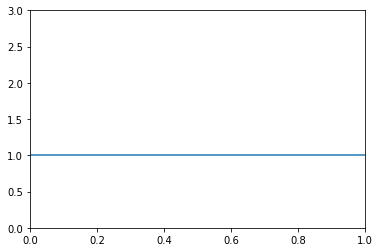

In [95]:
a = 1.0
b = 1.0

x = np.linspace(0, 1, 1002)[1:-1]

dist = beta(a,b)
plt.plot(x, dist.pdf(x),label='a=1,b=1')
plt.xlim(0, 1)
plt.ylim(0, 3)

Although it sounds like it would make no difference, it turns out that a uniform prior can still add information and change the probabilities, particularly if your experiment has low success rates or low numbers of trials (for Binomial events say).   Think about it this way: using a uniform prior in a Bernoulli experiment is equivalent to adding two observations to the data: one success and one fail (or one heads, one tails) etc. 

### <font color=#4290C4>Example</font>

Suppose we have an experiment running $N$ Bernoulli trials where $\nu$ successes are recorded.  The unknown probability of success is $p$. A sutiable uniform prior would be $p(\theta) = 1$.  <br><br> 

One might think we do not gain anything from a uniform prior, but using a uniform prior in a Bernoulli experiment is equivalent to adding two observations to the data, one success and one fail (or one heads, one tails).  Here we will prove it can make a difference.<br><br>

Compare expressions for the expectation value expected from the data (the mean of the Bernoulli distribution) with that from the posterior.<br><br>

Calculate these for small $N$ and $\nu$ and large $N$ and $\nu$. 

###  <font color=#c38241> Solution</font>

Click below to see the solution.

For $\nu$ successes and $N$ trials, the Bernoulli mean is given by $p=\nu/N$. 

The prior is a beta function with $a=1,b=1$.

The posterior mean for this family, with a beta prior is given by

${\rm experiment~ mean} = \dfrac{\nu}{N}$

so

${\rm posterior~ mean} = \dfrac{\nu}{N}\dfrac{N}{N+a+b} + \dfrac{a}{a+b}\dfrac{a+b}{N+a+b}$ for $a$ and $b$ from priors.

Or we can write

${\rm posterior~ mean} = \dfrac{\nu+a_{\rm post}}{N+a_{\rm post}+b_{\rm post}}$ where $a_{\rm post}$ and $b_{\rm post}$ are given by $\nu+a$ and $N-\nu+b$.

In [61]:
def post_mean_bin(n,nu,a,b):
    a_post = nu + a
    b_post = n - nu + b
    return (nu+a)/(n+a+b)

def bern_mean(n,nu):
    return nu/n

# let's test some values of nu_test,N_test
nu_test = [2.,8.,80.,800.]
N_test = [10.,10.,100.,1000.]

#
a_prior = 1.
b_prior = 1.

for i in range(0,len(nu_test)):
    print("N=",N_test[i],"nu=",nu_test[i])
    print('ratio between values from data + posterior is \
    {:.3f}'.format(bern_mean(N_test[i],nu_test[i])/post_mean_bin(N_test[i],nu_test[i],a_prior,b_prior)))


N= 10.0 nu= 2.0
ratio between values from data + posterior is     0.800
N= 10.0 nu= 8.0
ratio between values from data + posterior is     1.067
N= 100.0 nu= 80.0
ratio between values from data + posterior is     1.007
N= 1000.0 nu= 800.0
ratio between values from data + posterior is     1.001


So for the same $N$, the lower the success rate $\nu$, the larger the difference between the posterior and the data values are - ie the uniform prior does affect the estimate of $\theta$ from the posterior.  Difference is smaller for larger $N$.

*** 

### The Evidence term

At this point, you are probably wondering why we've neglected the evidence term! 

The evidence term is a number - it does not affect the shape of the distribution, just the absolute values of probability. The evidence term is just a normalisation for the problem. Often, we can ignore the evidence. For example when we just care the mean and variance of the posterior, the normalisation is not important. Also, if we simply want to the know the ratio of $\theta$ taking two values, we again don't need to know the normalisation of the posterior, so we can ignore the evidence. Similarly, if we are just interested in finding the overall shape of the posterior.

However, we've established that for the case of a normal likelihood, and a normal prior, the posterior is also normally distributed. Also, we've already worked out the width parameter of the normal, so in this case, it is trivial to normalise the posterior, and thus create a true PDF.

For problems where we really do want to know the actual probabilities, but where the maths is tricky, we can still work without evaluating the evidence in many cases. For example, one can get a crude approximation to a normalised posterior by first making a *histogram* of the posterior, and then numerically integrating to find the total area under the histogram. If one then divides the original histogram by this area, the result is a normalised histogram of the posterior, and as we mentioned early in Block A, this is an approximation to the posterior's underlying PDF.


***

## Credible Intervals

The outcome of Bayes Theorem gives us the posterior which in these cases provides us with the probability density function for the parameter $\theta$ given the data and how likely you think this is. So if the parameter is outside the credible interval we say it's not credible, if it lies within 95% of the credible interval we say it is credible.

So in Bayesian statistics, a credible interval is an interval within which an unobserved parameter value falls with a particular probability.

Recall that in Bayesianism, the probability distributions reflect our degree of belief. So when we compute the credible region it is equivalent to saying

- "Given our observed data, there is a 95% probability that the true value of the mean falls within the CR" - Bayesians

In frequentism, on the other hand, $\mu$ is considered a fixed value and the data (and all quantities derived from the data, including the bounds of the confidence interval) are random variables. So the frequentist confidence interval is equivalent to saying

- "There is a 95% probability that when I compute confidence intervals from data of this sort, the true mean will fall within the confidence interval."- Frequentists 

Here's another way again:

Suppose we read that the observed data $D_{\rm obs}$ support conclusion $C$. How do the two parties see this?

- "C was selected with a procedure that is right 95% of the time over a set of $D$ that includes $D_{\rm obs}$."- Frequentist 

- "The strength of the chain of reasoning from the model and $D_{\rm obs}$ to concluding C has probability 0.95." - Bayesian

Credible intervals for Gaussians produce similar results to confidence intervals, but this is simply because of the properties of Gaussians.

Note that credible intervals are also known as high density intervals. These are used in many areas of science, in particular in gravitational wave astronomy.

### <font color=#4290C4>Example</font>

Suppose you are told "Here is a confidence interval from the Large Hadron Collider experiment." What does it mean?

###  <font color=#c38241> Solution</font>

Click below to see the solution.

There are two ways you could answer the question:

1. “There is 95% probability/plausibility/likelihood that the population parameter lies in the interval.”

2. “If we repeat the experiment infinitely many times, 95% of the experiments will capture the population parameter in their confidence intervals.”

The first answer is wrong. The first statement is interpreting a *Bayesian credible interval*. The second is the correct interpretation of a frequentist confidence interval.

### <font color=#4290C4>Example</font>

We are given a coin at random, and asked to perform 50 flips. We find that heads comes up 35 of the 50 times. We want to know if the coin is fair. Plot the likelihood, prior and posterior distributions on one plot.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

The probability of obtaining the resulting series of heads (success) and tails (fail) is given by the Binomial distribution (since it is one coin flipped in a sequence of events/successes.

$p(\nu=35|N=50,\theta) = \theta^N(1-\theta)^{(N-\nu)}$

Since we were given the coin at random and we know nothing about it, we will adopt a uniform prior.

$p(\theta) = 1$ f or $0 < \theta < 1$.

Note that in this example I will write this simple as $p=1$ for all $x$  but a uniform prior for Bernoulli/Binomial family is equivalent to a beta function with $a=1,b=1$, so we could also write it as a beta function (we can also be written in the format = Beta(1,1)).

Our null hypothesis is that the coin is fair ($\theta=0.5$).

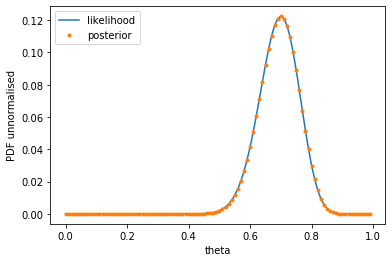

In [62]:
import numpy as np
import pylab as plt
import math

%matplotlib inline

nu = 35
N=50

# for plotting
nsteps=100

x = np.arange(0,1,1./nsteps)

likelihood_coin = (math.factorial(N)/(math.factorial(nu)*(math.factorial(N-nu))))*x**nu * (1 - x)**(N - nu) 

# prior is constant = 1 for all x 
prior_coin = [1.0 for i in range(0,len(x))]

# posterior = likelihood x prior
posterior_coin = likelihood_coin*prior_coin

#let's save an array of x and y for working out credible intervals later

plt.plot(x,likelihood_coin,label='likelihood')
plt.plot(x,posterior_coin,'.',label='posterior')

#plt.xlim(0,1)
plt.ylabel('PDF unnormalised')
plt.xlabel('theta')
plt.legend(loc='upper left')

### <font color=#4290C4>Example</font>

Now estimate the 95% credible intervals and the value we would expect for a fair coin $\theta = 0.5$. For a ROPE we could set this to something like $\theta = 0.5 \pm 0.025$. 

###  <font color=#c38241> Solution</font>

Click below to see the solution.

So is it fair? Let's assume we're approaching gaussian distribution for $N=50$ and simply use the fact that the mean $\pm 1.96 \sigma$ gives 95% probability intervals.

To do this we need to calculate the mean and standard deviation of the posterior. We can do this using the analytic expressions listed above for a bernoulli likelihood with beta prior.

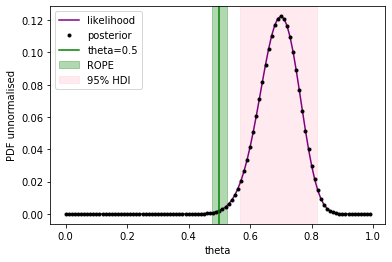

In [63]:
# posterior_mean 
nu =35.
N=50.

# uniform prior = beta(1,1) ie a=1, b=1
a = 1.
b = 1.
# posterior mean + std from analytical approx in lecture notes
posterior_mean_coin = np.float((nu+a)/(N+a+b))
posterior_std_coin = np.sqrt( posterior_mean_coin*(1-posterior_mean_coin)/(nu+a+N-nu+b+1))

# set up credible intervals = mean + / - 1.96 x sigma
HDI_a = posterior_mean_coin+1.96*posterior_std_coin
HDI_b = posterior_mean_coin-1.96*posterior_std_coin

plt.plot(x,likelihood_coin,label='likelihood',c='purple')
plt.plot(x,posterior_coin,'.',label='posterior',c='black',lw=2)

# this makes nice shaded regions to show off where the ROPE is
plt.axvspan(0.5-0.025,0.5+0.025,color='green',label='ROPE',alpha=0.3)
plt.axvspan(HDI_b,HDI_a,color='pink',label='95% HDI',alpha=0.3)

plt.axvline(0.5,color='green',label='theta=0.5')
#plt.ylim(0,6e-14)
plt.ylabel('PDF unnormalised')
plt.xlabel('theta')
plt.legend(loc='upper left')

The fair coin ($\theta=0.5$) falls outside the 95% HDI, so we can reject the null hypothesis that the coin is fair. 

Note that in python we could determine credible intervals if we assume that the posterior were normal by (i) using `scipy.stats` `norm.interval(0.95,mean,std)` function or (ii) numpy's `percentile(data,95)` function.

### <font color=#4290C4>Example</font>

Let's return to the question earlier about the student heights. Now we are going to assume the null hypothesis is that the height of a 20 year old student is  $>170$ cm. Determine the 95% credible intervals for the posterior. Plot this range over your posterior distribution. You can do this using lines axvline or axvspan to colour the entire range.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

95% confidence intervals are 163.606 and 170.634 cm


Text(0, 0.5, 'PDF')

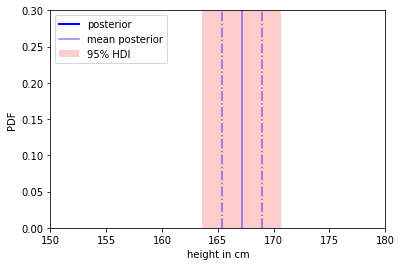

In [64]:
# to plot likelihood need to remember sigma= error on mean
#plt.plot(x,norm.pdf(x,data_mean,err_mean),label='likelihood',c='purple') #likelihood
#plt.plot(x,norm.pdf(x,prior_mean,np.sqrt(prior_var)),label='prior',c='red') # prior distribution

# can use norm.interval to get the interval out for 95% 
# note that 95% is roughly equivalent to 2xstandard deviations so they can use that
HDI_1,HDI_2 = norm.interval(0.95,posterior_mean,posterior_std)
print('95% confidence intervals are {:.3f} and {:.3f} cm'.format(HDI_1,HDI_2))

plt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior',c='blue',lw=2)
plt.axvline(posterior_mean,label='mean posterior',color='blue',alpha=0.5)
plt.axvline(posterior_mean+posterior_std,color='blue',ls='-.',alpha=0.5)
plt.axvline(posterior_mean-posterior_std,color='blue',ls='-.',alpha=0.5)
plt.axvspan(HDI_1,HDI_2,facecolor='red', alpha=0.2, label = '95% HDI')
plt.legend(loc='upper left')
plt.xlim(150,180)
plt.ylim(0,0.3)
plt.xlabel('height in cm')
plt.ylabel('PDF')

We want to test null hypothesis that height of a 20 year old student is $>170$cm. Can we reject the null hypothesis based on our data? 

Let's use everything $>170$cm as a reasonable region (our ROPE).

95% confidence intervals are 163.606 and 170.634 cm


Text(0, 0.5, 'PDF')

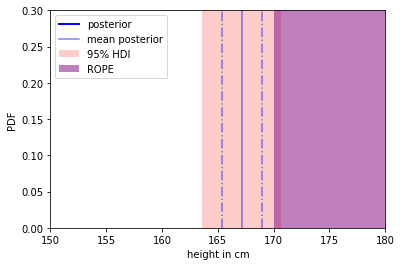

In [65]:
%matplotlib inline

# can use norm.interval to get the interval out for 95% 
HDI_1,HDI_2= norm.interval(0.95,posterior_mean,posterior_std)
print('95% confidence intervals are {:.3f} and {:.3f} cm'.format(HDI_1,HDI_2))

plt.plot(x,norm.pdf(x,posterior_mean,posterior_std),label='posterior',c='blue',lw=2)
plt.axvline(posterior_mean,label='mean posterior',color='blue',alpha=0.5)
plt.axvline(posterior_mean+posterior_std,color='blue',ls='-.',alpha=0.5)
plt.axvline(posterior_mean-posterior_std,color='blue',ls='-.',alpha=0.5)
plt.axvspan(HDI_1,HDI_2,facecolor='red', alpha=0.2, label = '95% HDI')
plt.axvspan(170,170+10,facecolor='purple', alpha=0.5, label = 'ROPE')

plt.legend(loc='upper left')
plt.xlim(150,180)
plt.ylim(0,0.3)
plt.xlabel('height in cm')
plt.ylabel('PDF')

The ROPE is just within the 95% confidence interval, so although we cannot reject the null hypothesis that students heights are $>170$cm as it lies *just within our credible region*, the data does not give strong evidence for the null hypothesis. 

***

## Some real life examples

1. The incredible discovery of gravitational waves existing in the Universe in 2017 led to the award of a Nobel Prize. The gravitational waves were from a binary neutron star merger, also observed using electromagnetic telescopes sensitive to light across the entire electromagnetic spectrum.  As well as discovering a new kind of physics, the observations allowed scientists to combine the galaxy distance measured from the gravitational-wave data with radial velocity measurements from the electromagnetic data. In doing so, they were able to make an entirely independent measurement of an important quantity in cosmology: the present-day [expansion rate of the Universe](https://www.ligo.org/science/Publication-GW170817Hubble/).
    
    <img src="https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter%206/hubble_posterior.png" width="400">

    The figure above shows the measurement of the Hubble constant, $H_0$ (the expansion rate of the Universe) determined using the gravitational wave signals. The relative probability of different values of $H_0$ is represented by the solid blue curve- with a peak at $70 \rm \,km\,s^{-1} Mpc^{-1}$. Dashed and dotted blue lines show the 68.3% and 95.4% credible intervals for $H_0$. For comparison the green and orange bands represent measurements of $H_0$ from two experiments using electromagnetic data: the Planck satellite and the SHoES analysis (exploding stars and twinkling lights). The darker and lighter coloured bands indicate 68.3% and 95.4% credible intervals for these values.  Scientists were able to conclude from this figure that the Planck and SHoES measurements of the expansion rate of the Universe are not in agreement with each other at the 95.4% probability level. However, the gravitational-wave result is, consistent with both the Planck and SHoES values. *Figure reproduced from this [site](https://www.ligo.org/science/Publication-GW170817Hubble/).*


***

Now you are ready to tackle the **Chapter 6 quiz** on Learning Central and the [Chapter 6 yourturn notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter%206/Chapter6_yourturn.ipynb).